In [51]:
import os
import wave
from matplotlib import pyplot as plt
from matplotlib.mlab import PCA
%matplotlib inline
import numpy as np
from scipy import signal

In [116]:
# absolute path to database
db_path = '/home/felix/Schreibtisch/gleichschaltung/'
os.chdir(db_path)

folders = os.listdir()

specs = []

for i, syll_folder in enumerate(folders):
    os.chdir(db_path +'/'+syll_folder)
    files = os.listdir()
    for j , file in enumerate(files):
        w = wave.open(db_path +'/'+syll_folder + '/' + file) 
        sample = w.readframes(w.getnframes())
        # get waveform
        waveform = np.fromstring(sample, 'Int16')
        # compute spectrogram
        f, t, Sxx = signal.spectrogram(waveform, 44100.0, nperseg= 256, nfft = 512)
        specs.append(Sxx)
        
        
for i in range(len(specs)):
    spec = specs[i]
    print(spec.shape)
    # average over the spectograms
    #avg_spec =
    
    # test if average of spectrogram looks crappy due to different onsets of the signal etc
    # if that is the case ->
    # an idea would be to use dynamic time warping to align the signals 
    # easier approach to find onset of the signal: thresholding
    
    # then perfom PCA on the flattened (vector-format) spectograms (need to be same length - 
    # maybe that can be accomplished by DTW as well ~~~ ) and find "eigenfaces" of the spectograms. 
    # Hopefully they look good ;)
    
    # DTW: https://de.wikipedia.org/wiki/Dynamic-Time-Warping
    # DTW: http://mlpy.sourceforge.net/docs/3.4/dtw.html
    

(257, 60)
(257, 52)
(257, 53)
(257, 55)
(257, 41)
(257, 50)


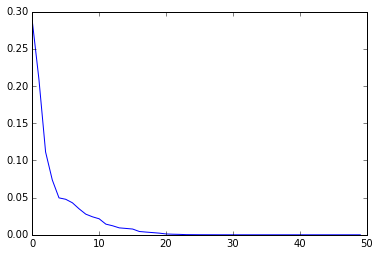

In [117]:
data = np.array(Sxx)
#print(data.shape)

myPCA = PCA(data)

plt.rcParams['figure.figsize'] = (6.0, 4.0)
plt.plot(myPCA.fracs)

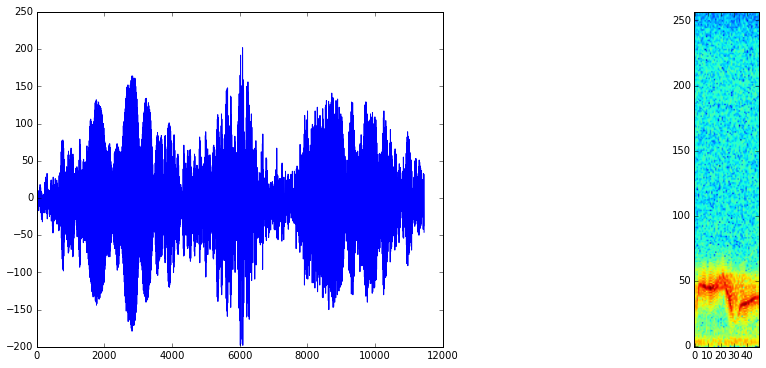

In [118]:
# Plotting
plt.rcParams['figure.figsize'] = (16.0, 6.0)

plt.subplot(1,2,1)
plt.plot(waveform)

plt.subplot(1,2,2)
plt.imshow(np.log(Sxx))
plt.gca().invert_yaxis()